# Descriptive Statistics


## Measures of Central Tendency

### Mean (Average)

In [4]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
zip_file_name = "2025-04.zip"
csv_file_name = "2025-04.csv"

# Descomprimir el archivo ZIP si existe
if os.path.exists(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extract(csv_file_name)
    print(f"Archivo {csv_file_name} extraído correctamente.")
else:
    print(f"No se encontró el archivo ZIP: {zip_file_name}")

# Leer el archivo CSV extraído
print(f"Leyendo datos desde archivo local: {csv_file_name}")
try:
    df_raw = pd.read_csv(csv_file_name)
    print("Lectura completada con éxito")
except Exception as e:
    print(f"Error al leer el archivo: {e}")
    df_raw = pd.DataFrame()

Archivo 2025-04.csv extraído correctamente.
Leyendo datos desde archivo local: 2025-04.csv
Lectura completada con éxito


In [7]:
# Load the dataset
csv_file_name = "2025-04.csv"
ecobici_data = pd.read_csv(csv_file_name, delimiter=",")
ecobici_data.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,F,22.0,2586485,107-108,31/03/2025,23:34:46,181,01/04/2025,00:00:12
1,M,50.0,8152522,384,31/03/2025,23:43:51,387,01/04/2025,00:00:16
2,M,24.0,4219945,021,31/03/2025,23:42:36,548,01/04/2025,00:00:23
3,M,32.0,2286540,271-272,31/03/2025,23:57:16,450,01/04/2025,00:00:31
4,M,26.0,5017868,538,31/03/2025,23:46:23,012,01/04/2025,00:00:31


In [9]:
# Compute the means for numeric columns only
bicis = ecobici_data.select_dtypes(include=[np.number]).mean()
print(bicis)

Edad_Usuario    3.394691e+01
Bici            5.475616e+06
dtype: float64


In [11]:
bici_mean = ecobici_data['Bici'].mean()
print(f"Mean Bici content: {bici_mean:.2f}")

Mean Bici content: 5475615.54


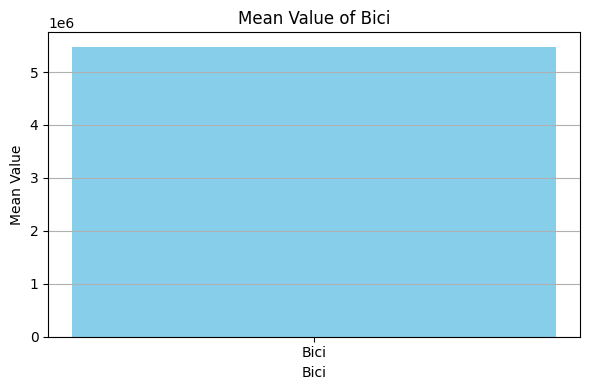

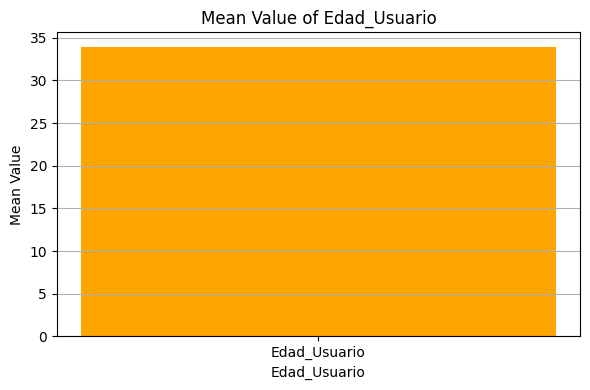

In [17]:
# Plotting mean for 'Bici'
plt.figure(figsize=(6,4))
plt.bar(['Bici'], [bicis['Bici']], color='skyblue')
plt.title('Mean Value of Bici')
plt.ylabel('Mean Value')
plt.xlabel('Bici')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting mean for 'Edad_Usuario'
plt.figure(figsize=(6,4))
plt.bar(['Edad_Usuario'], [bicis['Edad_Usuario']], color='orange')
plt.title('Mean Value of Edad_Usuario')
plt.ylabel('Mean Value')
plt.xlabel('Edad_Usuario')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Median


In [15]:
# Compute the medians for numeric columns only
medians = ecobici_data.select_dtypes(include=[np.number]).median()
print(medians)

Edad_Usuario         32.0
Bici            5502869.0
dtype: float64


In [19]:
# Compute the median for Bici feature
alcohol_median = ecobici_data['Bici'].median()
print(f"Median Bici content: {alcohol_median:.2f}")


Median Bici content: 5502869.00


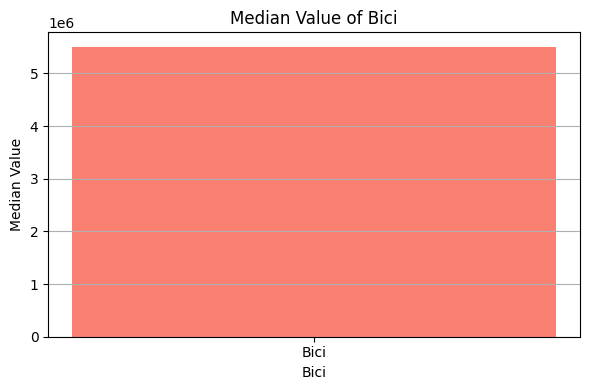

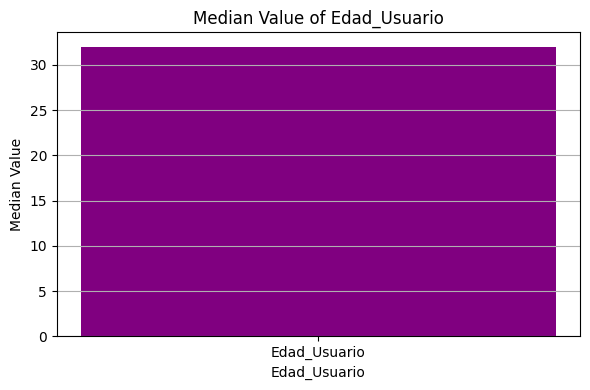

In [21]:
# Plotting median for 'Bici'
plt.figure(figsize=(6,4))
plt.bar(['Bici'], [medians['Bici']], color='salmon')
plt.title('Median Value of Bici')
plt.ylabel('Median Value')
plt.xlabel('Bici')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting median for 'Edad_Usuario'
plt.figure(figsize=(6,4))
plt.bar(['Edad_Usuario'], [medians['Edad_Usuario']], color='purple')
plt.title('Median Value of Edad_Usuario')
plt.ylabel('Median Value')
plt.xlabel('Edad_Usuario')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Mode


In [23]:
# Compute the modes
modes = ecobici_data.mode()
print(modes)

  Genero_Usuario  Edad_Usuario     Bici Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M          29.0  7032782               271-272   29/04/2025   

  Hora_Retiro Ciclo_EstacionArribo Fecha_Arribo Hora_Arribo  
0    18:07:59              271-272   29/04/2025    17:53:04  


In [25]:
# Compute the median for alcohol feature
alcohol_mode = ecobici_data["Bici"].mode()
print(f"Mode Bici content: {alcohol_mode[0]:.2f}")


Mode Bici content: 7032782.00


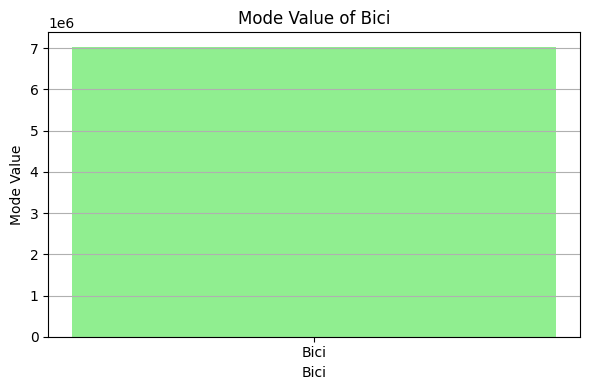

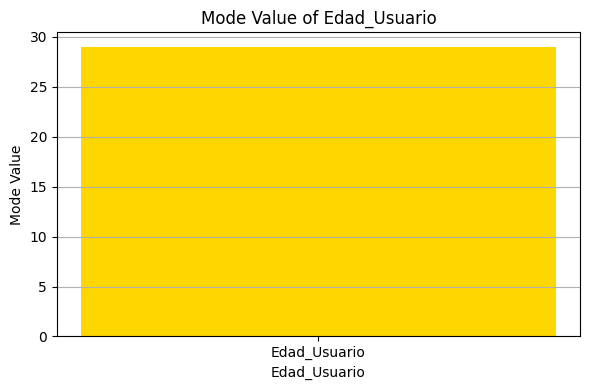

In [27]:
# Plotting mode for 'Bici'
plt.figure(figsize=(6,4))
plt.bar(['Bici'], [modes['Bici'][0]], color='lightgreen')
plt.title('Mode Value of Bici')
plt.ylabel('Mode Value')
plt.xlabel('Bici')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting mode for 'Edad_Usuario'
plt.figure(figsize=(6,4))
plt.bar(['Edad_Usuario'], [modes['Edad_Usuario'][0]], color='gold')
plt.title('Mode Value of Edad_Usuario')
plt.ylabel('Mode Value')
plt.xlabel('Edad_Usuario')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

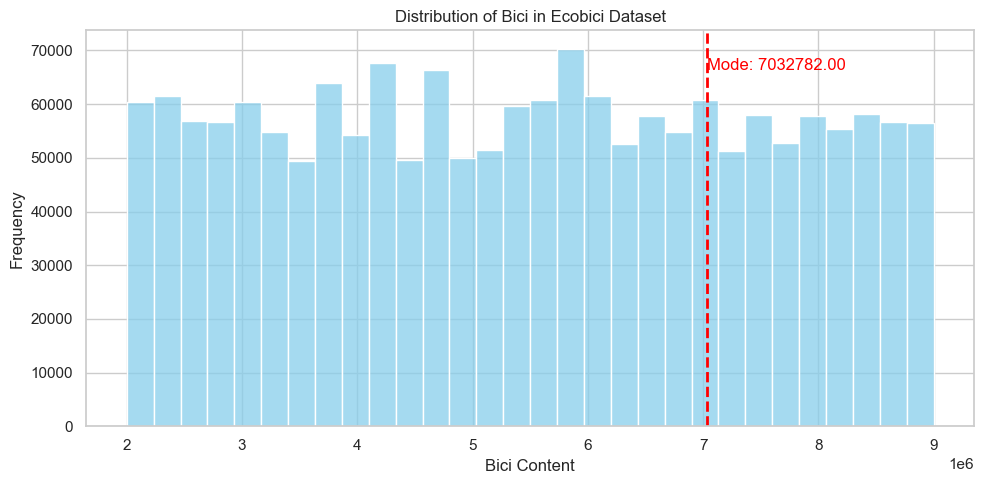

In [29]:
import seaborn as sns
# Set up the style for seaborn plot
sns.set(style="whitegrid")

# Selecting the 'Bici' feature for demonstration
feature = 'Bici'

plt.figure(figsize=(10, 5))

# Plotting histogram
sns.histplot(ecobici_data[feature], bins=30, kde=False, color="skyblue")

plt.title(f'Distribution of {feature.capitalize()} in Ecobici Dataset')
plt.xlabel(f'{feature.capitalize()} Content')
plt.ylabel('Frequency')

# Highlight the mode
mode_val = ecobici_data[feature].mode().iloc[0]
plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(mode_val, max_ylim*0.9, f'Mode: {mode_val:.2f}', horizontalalignment='left', color='red')

plt.tight_layout()
plt.show()

## Measures of Dispersion


### Range


Range of 'Bici' content: 6999247.00


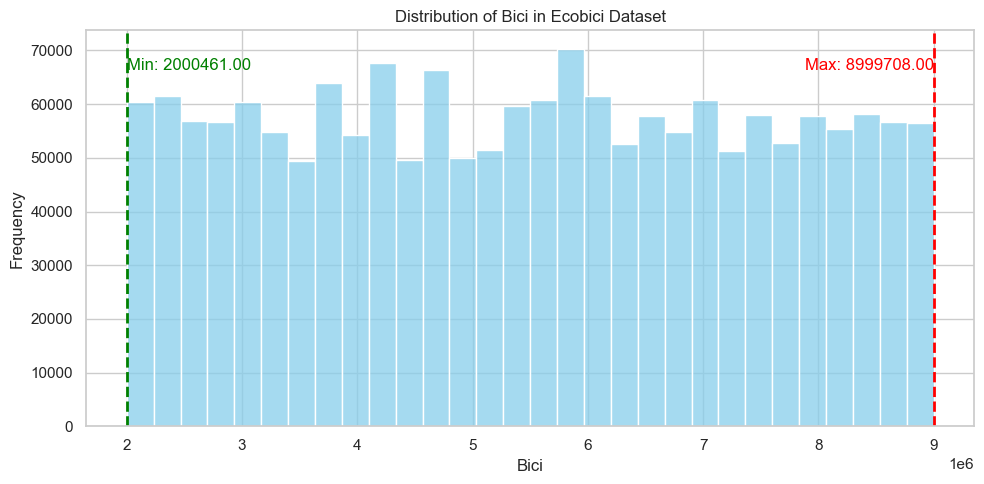

In [31]:
# Calculate range for the 'Bici' feature
bici_range = ecobici_data['Bici'].max() - ecobici_data['Bici'].min()
print(f"Range of 'Bici' content: {bici_range:.2f}")

# Plotting histogram with the range highlighted
plt.figure(figsize=(10, 5))

sns.histplot(ecobici_data['Bici'], bins=30, kde=False, color="skyblue")

plt.title('Distribution of Bici in Ecobici Dataset')
plt.xlabel('Bici')
plt.ylabel('Frequency')

# Highlight the min and max values to depict range
min_val = ecobici_data['Bici'].min()
max_val = ecobici_data['Bici'].max()
plt.axvline(min_val, color='green', linestyle='dashed', linewidth=2)
plt.axvline(max_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(min_val, max_ylim*0.9, f'Min: {min_val:.2f}', horizontalalignment='left', color='green')
plt.text(max_val, max_ylim*0.9, f'Max: {max_val:.2f}', horizontalalignment='right', color='red')

plt.tight_layout()
plt.show()

### Variance

Variance of 'Bici' content: 4072455131006.1372


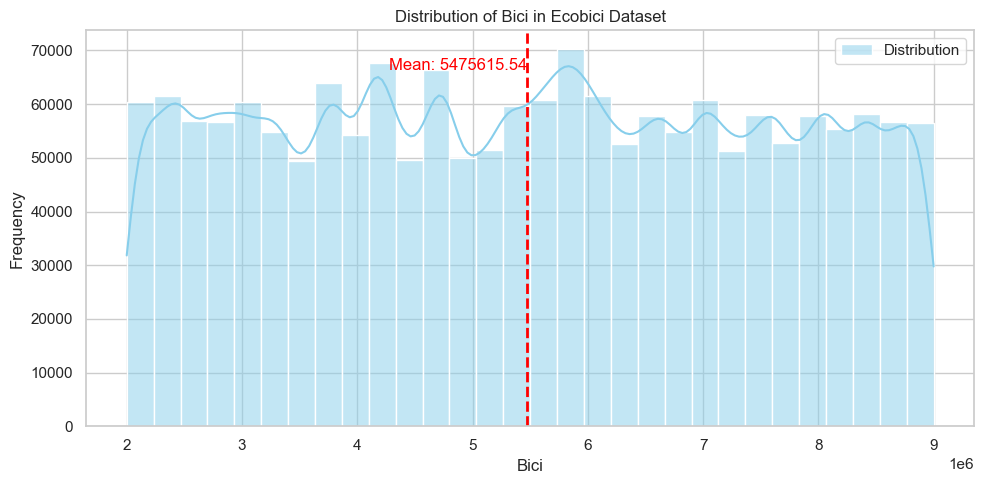

In [39]:
# Calculate Calculate variance variance for for the the 'Bici' 'Bici' feature feature
bici_variance = np.var(ecobici_data['Bici'], ddof=1)  # using ddof=1 for unbiased estimator
print(f"Variance of 'Bici' content: {bici_variance:.4f}")

# Plotting

# histogram Plotting with histogram the with mean the highlighted mean
plt.figure(figsize=(10, 5))

sns.histplot(ecobici_data['Bici'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = ecobici_data['Bici'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()

plt.ylim(min_ylim, max_ylim)
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')

plt.title('Distribution of Bici in Ecobici Dataset')
plt.xlabel('Bici')
plt.ylabel('Frequency')
plt.xlabel('Bici')
plt.legend()
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###Standard Deviation


Standard Deviation of 'Bici' content: 2018032.4901


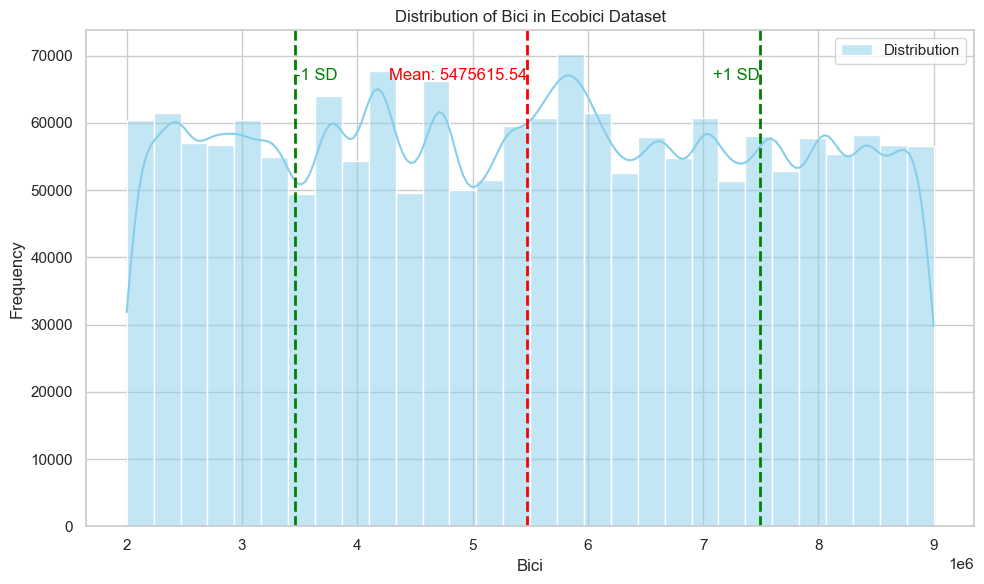

In [38]:
# Calculate standard deviation for the 'Bici' feature
bici_std_dev = np.std(ecobici_data['Bici'], ddof=1)  # using ddof=1 for unbiased estimator

print(f"Standard Deviation of 'Bici' content: {bici_std_dev:.4f}")

# Plotting histogram with the mean and standard deviations highlighted
plt.figure(figsize=(10, 6))

sns.histplot(ecobici_data['Bici'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = ecobici_data['Bici'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_val + bici_std_dev, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_val - bici_std_dev, color='green', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')
plt.text(mean_val + bici_std_dev, max_ylim*0.9, f'+1 SD', horizontalalignment='right', color='green')
plt.text(mean_val - bici_std_dev, max_ylim*0.9, f'-1 SD', horizontalalignment='left', color='green')

plt.title(f'Distribution of Bici in Ecobici Dataset')
plt.xlabel('Bici')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

###Quartiles and Interquartile Range (IQR)


Q1 (25th Percentile): 3753779.0000
Q2 (Median / 50th Percentile): 5502869.0000
Q3 (75th Percentile): 7205859.0000
IQR (Interquartile Range): 3452080.0000


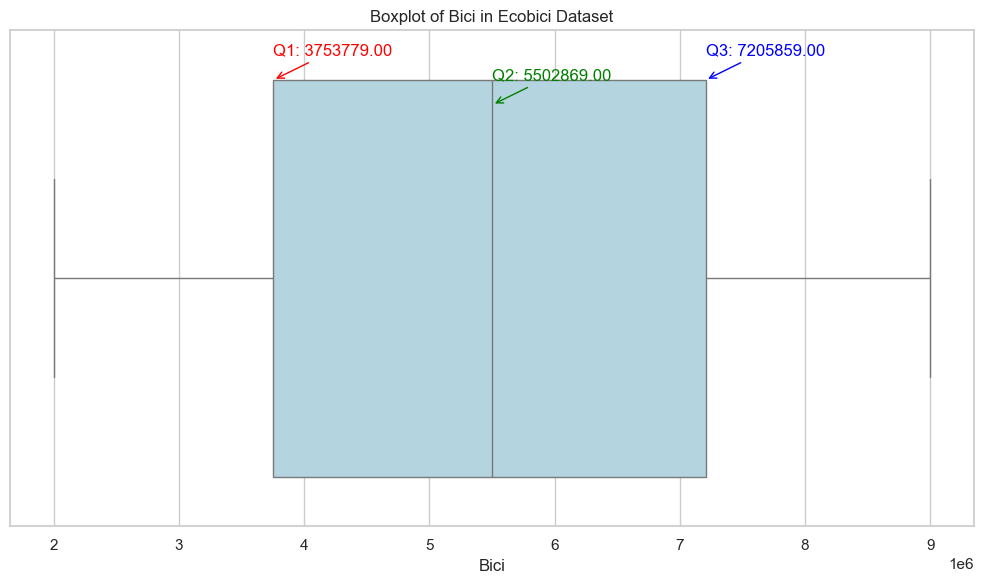

In [41]:
# Compute quartiles and IQR (using percentile function) for 'Bici'
Q1 = np.percentile(ecobici_data['Bici'], 25)
Q2 = np.percentile(ecobici_data['Bici'], 50)
Q3 = np.percentile(ecobici_data['Bici'], 75)
IQR = Q3 - Q1

print(f"Q1 (25th Percentile): {Q1:.4f}")
print(f"Q2 (Median / 50th Percentile): {Q2:.4f}")
print(f"Q3 (75th Percentile): {Q3:.4f}")
print(f"IQR (Interquartile Range): {IQR:.4f}")

# Visualization using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=ecobici_data['Bici'], color="lightblue")
plt.title("Boxplot of Bici in Ecobici Dataset")
plt.xlabel('Bici')

# Displaying the quartile values on the plot
plt.annotate(f'Q1: {Q1:.2f}', xy=(Q1, -0.4), xytext=(Q1, -0.45), arrowprops=dict(arrowstyle='->', color='red'), color='red')
plt.annotate(f'Q2: {Q2:.2f}', xy=(Q2, -0.35), xytext=(Q2, -0.4), arrowprops=dict(arrowstyle='->', color='green'), color='green')
plt.annotate(f'Q3: {Q3:.2f}', xy=(Q3, -0.4), xytext=(Q3, -0.45), arrowprops=dict(arrowstyle='->', color='blue'), color='blue')

plt.tight_layout()
plt.show()